## #01. 패키지 설치

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

# 클러스터 알고리즘 참조
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

## #02. 데이터 가져오기

In [4]:
origin = pd.read_excel("https://data.hossam.kr/G02/customer.xlsx", index_col='고객ID')
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      200 non-null    object
 1   나이      200 non-null    int64 
 2   연수입     200 non-null    int64 
 3   지출점수    200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


,성별,나이,연수입,지출점수
고객ID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### 연수입에 따른 지출점수 확인

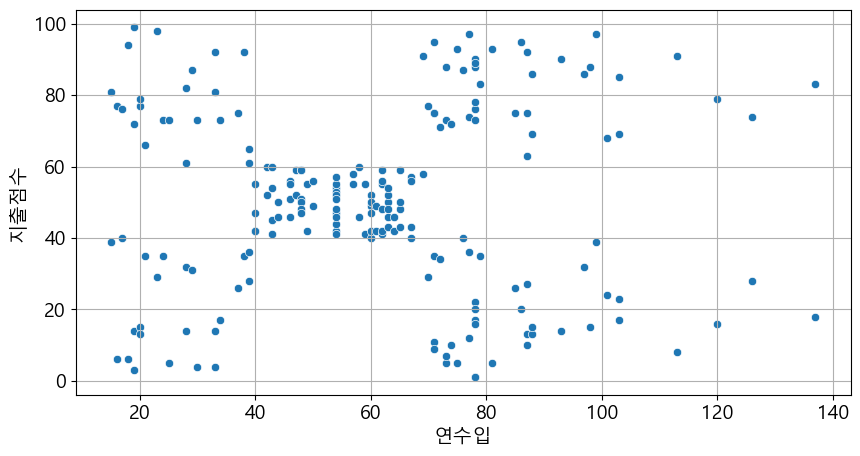

In [6]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='연수입', y='지출점수')
plt.grid()
plt.show()
plt.close()

## #03. 데이터 전처리

### 필요한 필드 추출

In [7]:
x = origin.filter(['연수입', '지출점수'])
x.head()

,연수입,지출점수
고객ID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


### 데이터 표준화

In [8]:
scaler = StandardScaler()
scaler.fit(x)
n_data = scaler.transform(x)
n_data[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## #04. DBSCAN 구현

### 모델구축

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(n_data)

DBSCAN()

### 군집결과

In [10]:
cluster_label = dbscan.labels_
cluster_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64)

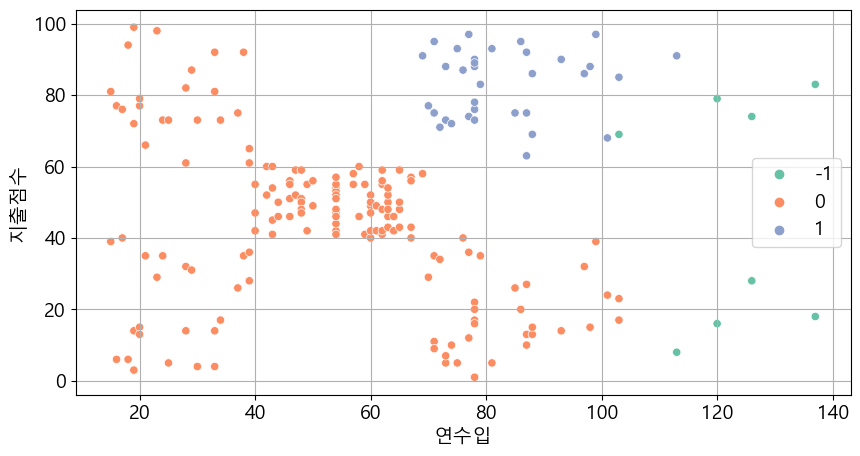

In [11]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='연수입', y='지출점수', hue=cluster_label, palette='Set2')
plt.grid()
plt.show()
plt.close()

> 0과 1 두 분류로 나뉨 (-1은 그룹에 속하지 못한 이상치들)

> DBSCAN은 이상치 검출에도 사용할 수 있다.

In [23]:
dbscan2 = DBSCAN(eps=0.3, min_samples=5)
dbscan2.fit(n_data)

DBSCAN(eps=0.3)

In [24]:
cluster_label2 = dbscan2.labels_
cluster_label2

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

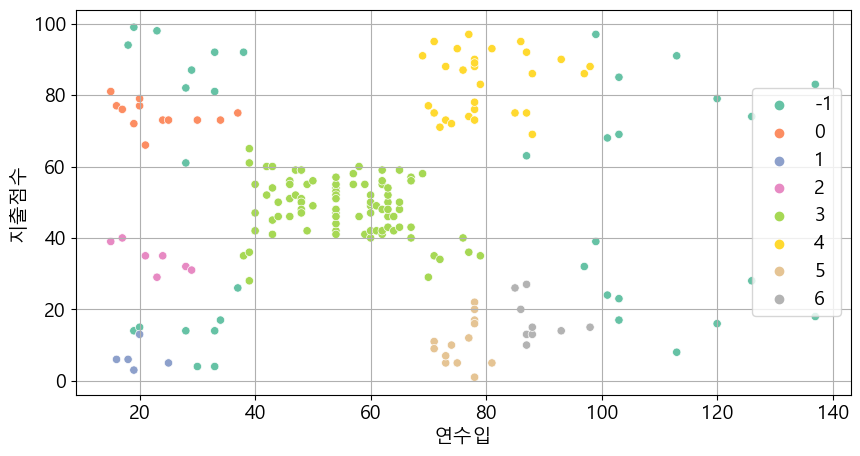

In [25]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='연수입', y='지출점수', hue=cluster_label2, palette='Set2')
plt.grid()
plt.show()
plt.close()

> eps 파라미터 조정 결과 :  더 많은 군집이 생성.

## #05. 핵심 포인트 확인

### 핵심포인트의 인덱스

In [26]:
core_sample_indices = dbscan2.core_sample_indices_ 
core_sample_indices

array([  1,   3,   5,   6,   9,  13,  15,  16,  18,  20,  21,  23,  26,
        31,  40,  42,  43,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 165,
       166, 170, 172, 173, 174, 176, 178, 179], dtype=int64)

### 해당 인덱스의 실 데이터

In [27]:
components = dbscan.components_
components

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718, -0.74537397],
       [-1.20462718,  1.42863343],
       [-1.16645776,

### 학습 데이터 중에서 핵심 포인트의 인덱스와 일치하는 데이터 찾기

In [28]:
is_core_samples = []

for i in range(0, n_data.shape[0]):
    if i in core_sample_indices:
        is_core_samples.append(1)
    else:
        is_core_samples.append(0)

print(is_core_samples)

[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 시각화

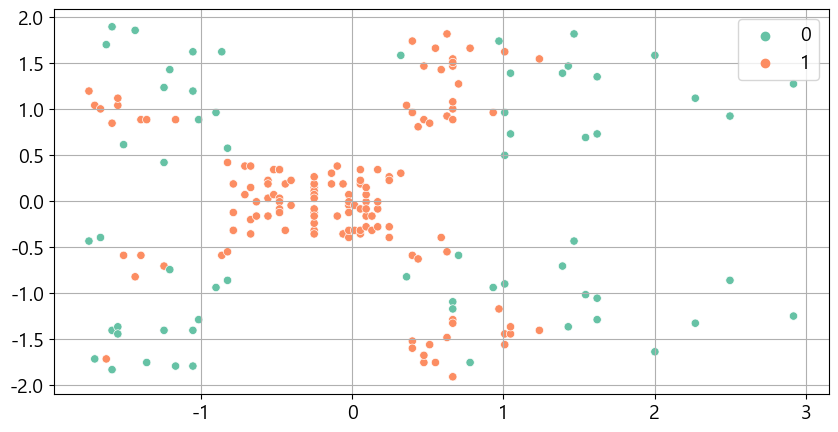

In [29]:
plt.figure(figsize=(10,5))
sb.scatterplot(x=n_data[:,0], y=n_data[:,1], hue=is_core_samples, palette='Set2')
plt.grid()
plt.show()
plt.close()

> 1은 군집이 이루어진 것, 0은 군집이 이루어지지 않은 것